# Data Analytics: OSEMN Framework

## Introduction

Mean of *Data* in **Data Analytics** &rarr; Structured Data &rarr; Can be easily analyzed &rarr; Spreadshit-like information

Data Analysis Goal &rarr; Gain insights from data

**Steps of the OSEMN framework:**
- [Obtain](#obtain)
- [Scrub](#scrub)
- [Explore](#explore)
- [Model](#modeling)
- [Interpret](#interpret)

## Obtain

In [110]:
# Import the comomn libraries in data analytics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('Transactions_Pet_Store.csv')
# Data Statistics
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      900 non-null    object
 1   product_category  903 non-null    object
 2   price             1000 non-null   int64 
 3   model             505 non-null    object
 4   quantity          1000 non-null   int64 
 5   product_line      1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


,product_name,product_category,price,model,quantity,product_line
0,Food,Accessory,1000,NaN,70,Cat
1,NaN,Food,20,Model_99,88,Dog
2,Collar,Toy,1000,NaN,84,Dog
3,Food,Toy,-10,Model_282,84,Cat
4,Toy,Toy,200,NaN,76,Cat


None

,price,quantity
count,1000.00000,1000.00000
mean,133.37000,50.48900
std,290.85338,28.40991
min,-50.00000,1.00000
25%,10.00000,25.00000
50%,20.00000,52.00000
75%,100.00000,75.00000
max,1000.00000,99.00000


## Scrub

Dirty data &rarr; doesn't represent the truth

Common **Dirty data** Problems &rarr; Duplicates, Formatting Issues, Missing Values, Typos/Incorrect Values.

------

1. **Scrub the obvious bits first:** Duplicates & Formatting Issues

In [111]:
# rows with duplicated rows
dup = df[df.duplicated()]
# Remove rows with duplicated rows
df = df.drop_duplicates()

# Check formatting of price column
valid_price = df['price'].apply(lambda x: isinstance(x, (int, float)))
# Check formatting of product_category column
valid_category = df['product_category'].apply(lambda x: isinstance(x, str))
df = df[valid_category | valid_price]

2. **Scrub more context-dependent:** Incorrect Information & Missing Values

In [112]:
# Remove and replace incorrect value in price column
df.price = df[df['price'] < 1000]['price']
mask_price = df.price < 0
df.loc[mask_price, 'price'] *= -1

# Replace missing values in product_name, model columns
df['product_name'] = df['product_name'].fillna('Product')
df['model'] = df['model'].fillna('unknown_model')

# Remove rows with missing values in specific columns
df = df.dropna(subset = ['price', 'quantity', 'product_category'])

# Reset the index of the DataFrame after removing scrubing
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      808 non-null    object 
 1   product_category  808 non-null    object 
 2   price             808 non-null    float64
 3   model             808 non-null    object 
 4   quantity          808 non-null    int64  
 5   product_line      808 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 38.0+ KB


## Explore

**Exploring Data** &rarr; Looking for patterns

------

- Numerical qualifies via statistics
- Visual qualifies via charts

**Purpose of Visuallization:**
- Explanatory

- Exploratory: **Distribution (*Box plot*, *Violin Plot*, *Histogram*)**  - **Category (*Bar Plot*)** -              **Relationship (*Line Plot*, *Scatter Plot*)**


quantity
product_line product_category          
Cat          Accessory             8777
             Food                  6706
             Toy                   4571
Dog          Accessory             8527
             Food                  6860
             Toy                   5295

Text(0, 0.5, 'Product Category')

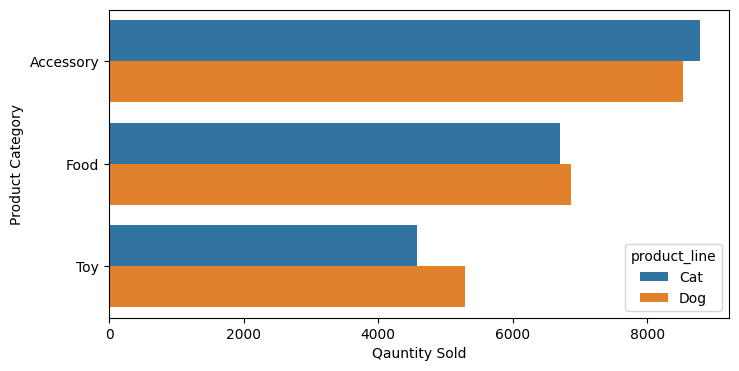

In [123]:
# Explane the data by grouping
product_line_group = df.groupby(['product_line', 'product_category'])
sold_quantity_df = product_line_group[['quantity']].agg('sum')
display(sold_quantity_df)

# Plotting the data
plt.figure(figsize=(8, 4))
ax = sns.barplot(data = sold_quantity_df, x = 'quantity', y = 'product_category', hue = 'product_line')
ax.set_xlabel('Qauntity Sold')
ax.set_ylabel('Product Category')

## Modeling

**Modeling** : Forecasting the future

Tasks for Modeling: Regression (e.g., Time Series Data) - Classification - Clustering

## Interpret

**Goals of Interpretion** :
- Get key insights form the work
- Explain and share the findings
- Recommendations

<Axes: >

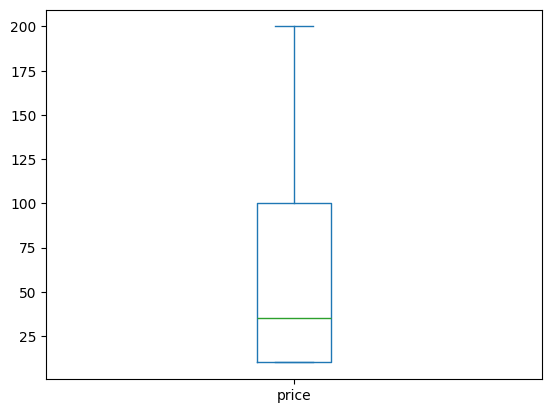

In [122]:
# Example: Box plot for get insights from price column
df['price'].plot.box()